<a href="https://colab.research.google.com/github/Yab112/-repo/blob/main/clustering_colors_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def warn(*args,**kwarrgs) -> None:
  pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:

%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pandas as pd
import io
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [ ]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")


##clustere colors from the image
--first load the image

In [ ]:
from PIL import Image
import requests
from io import BytesIO

(-0.5, 639.5, 479.5, -0.5)

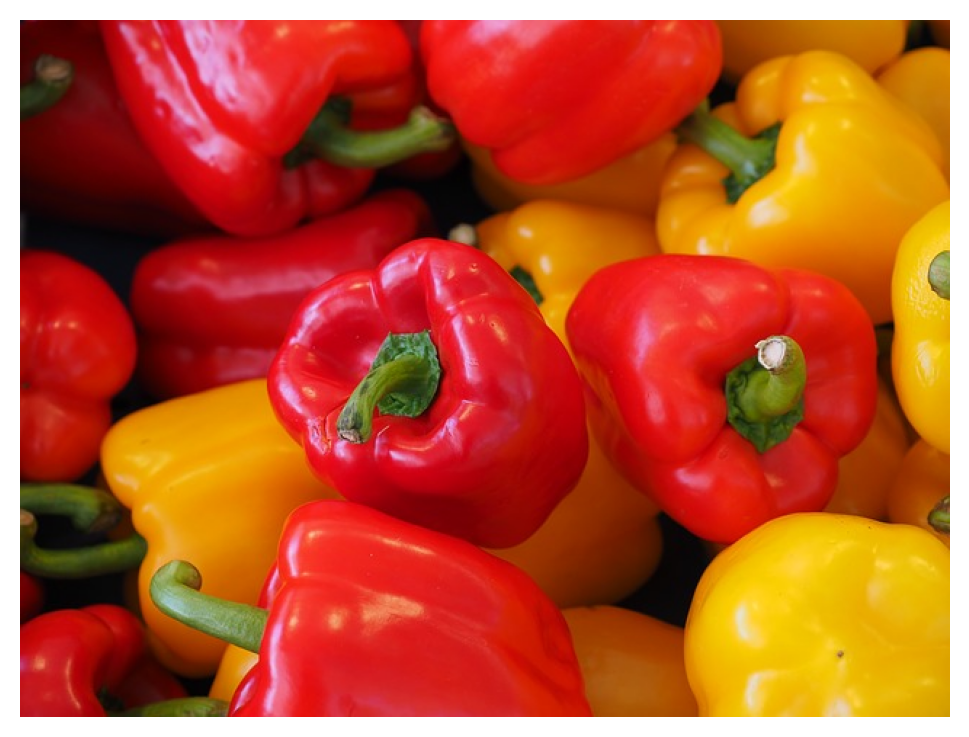

In [ ]:
response = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/peppers.jpg')
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')

In [ ]:
img.size

(640, 480)

change the image to the array and do the reshape and some other cool staffs on the image

In [ ]:
img_arr = np.array(img)
img_arr.shape

(480, 640, 3)

In [ ]:
flat_img = img_arr.reshape(img_arr.shape[0] * img_arr.shape[1] ,3)
flat_img[:10,:]

array([[ 21,  16,  23],
       [ 28,  15,  22],
       [ 45,  14,  22],
       [ 65,  16,  22],
       [ 84,  14,  24],
       [ 96,  13,  23],
       [106,  13,  24],
       [111,  15,  29],
       [118,  24,  40],
       [114,  26,  42]], dtype=uint8)

In [ ]:
flat_img.shape

(307200, 3)

Write code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.


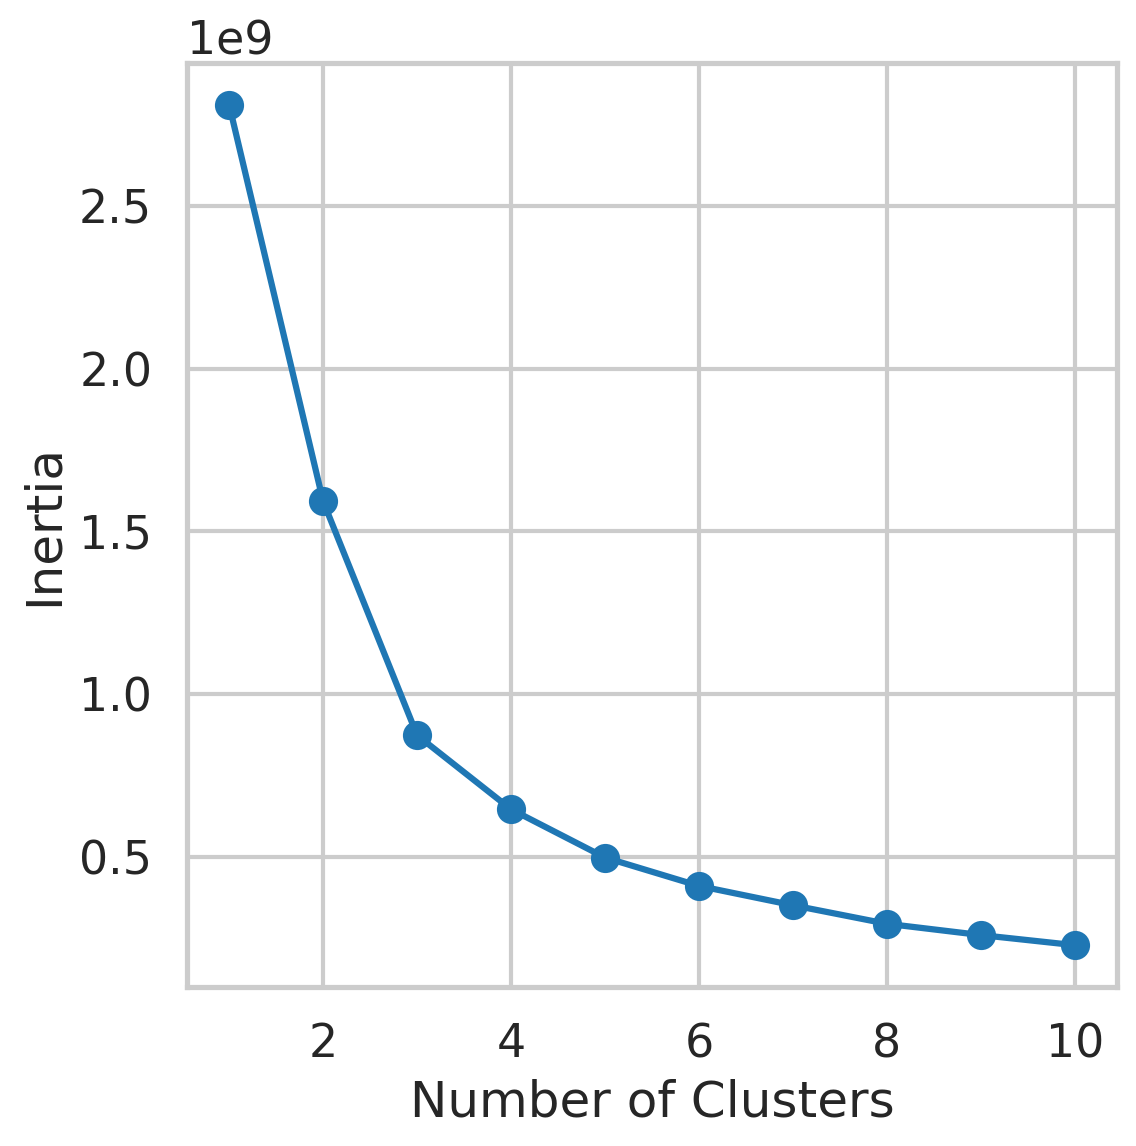

In [ ]:

inertia = []
list_num_clusters = list(range(1,9))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(flat_img)
    inertia.append(km.inertia_)

plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [ ]:
model = KMeans(n_clusters=8,random_state = 0 ).fit(flat_img)
model

KMeans(random_state=0)



>cluster_centers

>  the shape of the array (3, 3) indicates that there are three clusters, and each cluster center is represented by a three-element array, corresponding to the feature values for that cluster center.





In [ ]:
cluster_centers = pd.DataFrame(model.cluster_centers_)
cluster_centers

,0,1,2
0,196.858328,101.848528,3.026472
1,138.479422,22.234089,4.049119
2,202.642981,18.304261,14.824042
3,236.631487,172.831859,8.149178
4,228.625564,134.900390,146.024692
5,44.408366,15.199426,6.373836
6,230.632743,46.726858,47.394072
7,100.017060,103.672890,35.758510


The kmeans.labels_ attribute returns an array where each element corresponds to the cluster label assigned to the corresponding data point. The cluster labels are integers **ranging from 0 to the number of clusters minus 1**.


> After fitting a K-means model to your data, you can access the cluster labels assigned to each data point using kmeans.labels_



In [ ]:
model.labels_.shape

(307200,)

In [ ]:
model.labels_

array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

**The np.unique()** function is used to obtain the unique elements from an array. In the context of model.labels_, if model is an instance of a fitted K-means model, model.labels_ represents the cluster labels assigned to each data point.

In [ ]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)


plot the graph to see the color that correspondes to each center



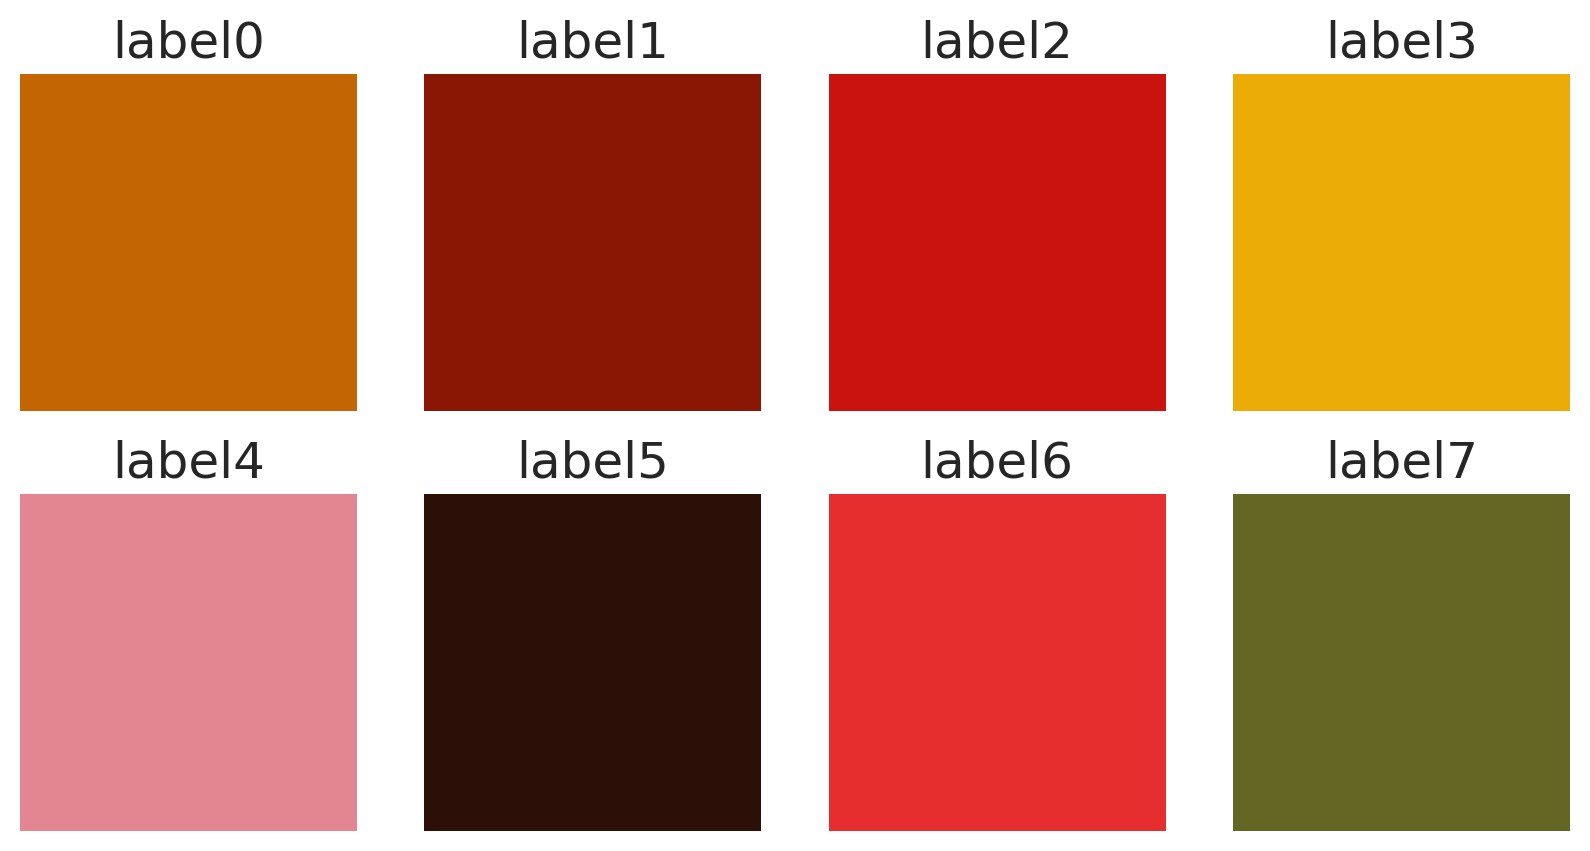

In [ ]:
plt.figure(figsize=[10,5])
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow([[np.array(model.cluster_centers_[i]).astype('uint8')]])
    plt.title('label'+str(i))
    plt.axis('off')

replace each row with its closest cluster center.

In [ ]:
flat_img2 = flat_img.copy()

for i in np.unique(model.labels_):
  flat_img2[model.labels_ == i,:] = model.cluster_centers_[i]


change the shape from (307200,3 ) to (480,640,3)

(-0.5, 639.5, 479.5, -0.5)

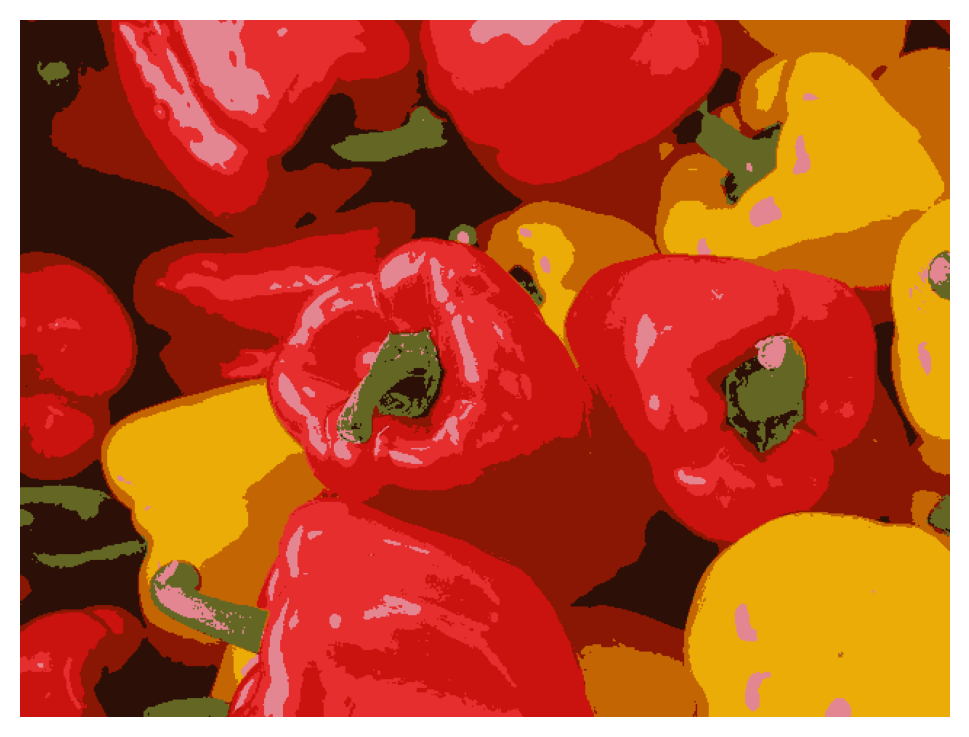

In [ ]:
img2 = flat_img2.reshape(img_arr.shape)
plt.imshow(img2)
plt.axis('off')

write afunction that accept image and number of cluster the returns the edited image and inertia value.

In [88]:
def cluster(img,k):
  img_arr = np.array(img)
  flat_img = img_arr.reshape(img_arr.shape[0] * img_arr.shape[1],3)
  cluster_model = KMeans(n_clusters = k,random_state=0).fit(flat_img)
  flat_img2 = flat_img.copy()

  for i in np.unique(cluster_model.labels_):
    flat_img2[cluster_model.labels_ == i,:] = cluster_model.cluster_centers_[i]
  edited_img = flat_img2.reshape(img_arr.shape)

  return edited_img,cluster_centers


try alist of number of clustering list and pass them to the above function and get edited image and inertia for every k values.

In [89]:
k_list = list(range(2,21,2))
inertia = []
img_list = []
for k in k_list:
    img2, iner_k = cluster(img,k)
    img_list.append(img2)
    inertia.append(iner_k)

time to show the final progress of the above

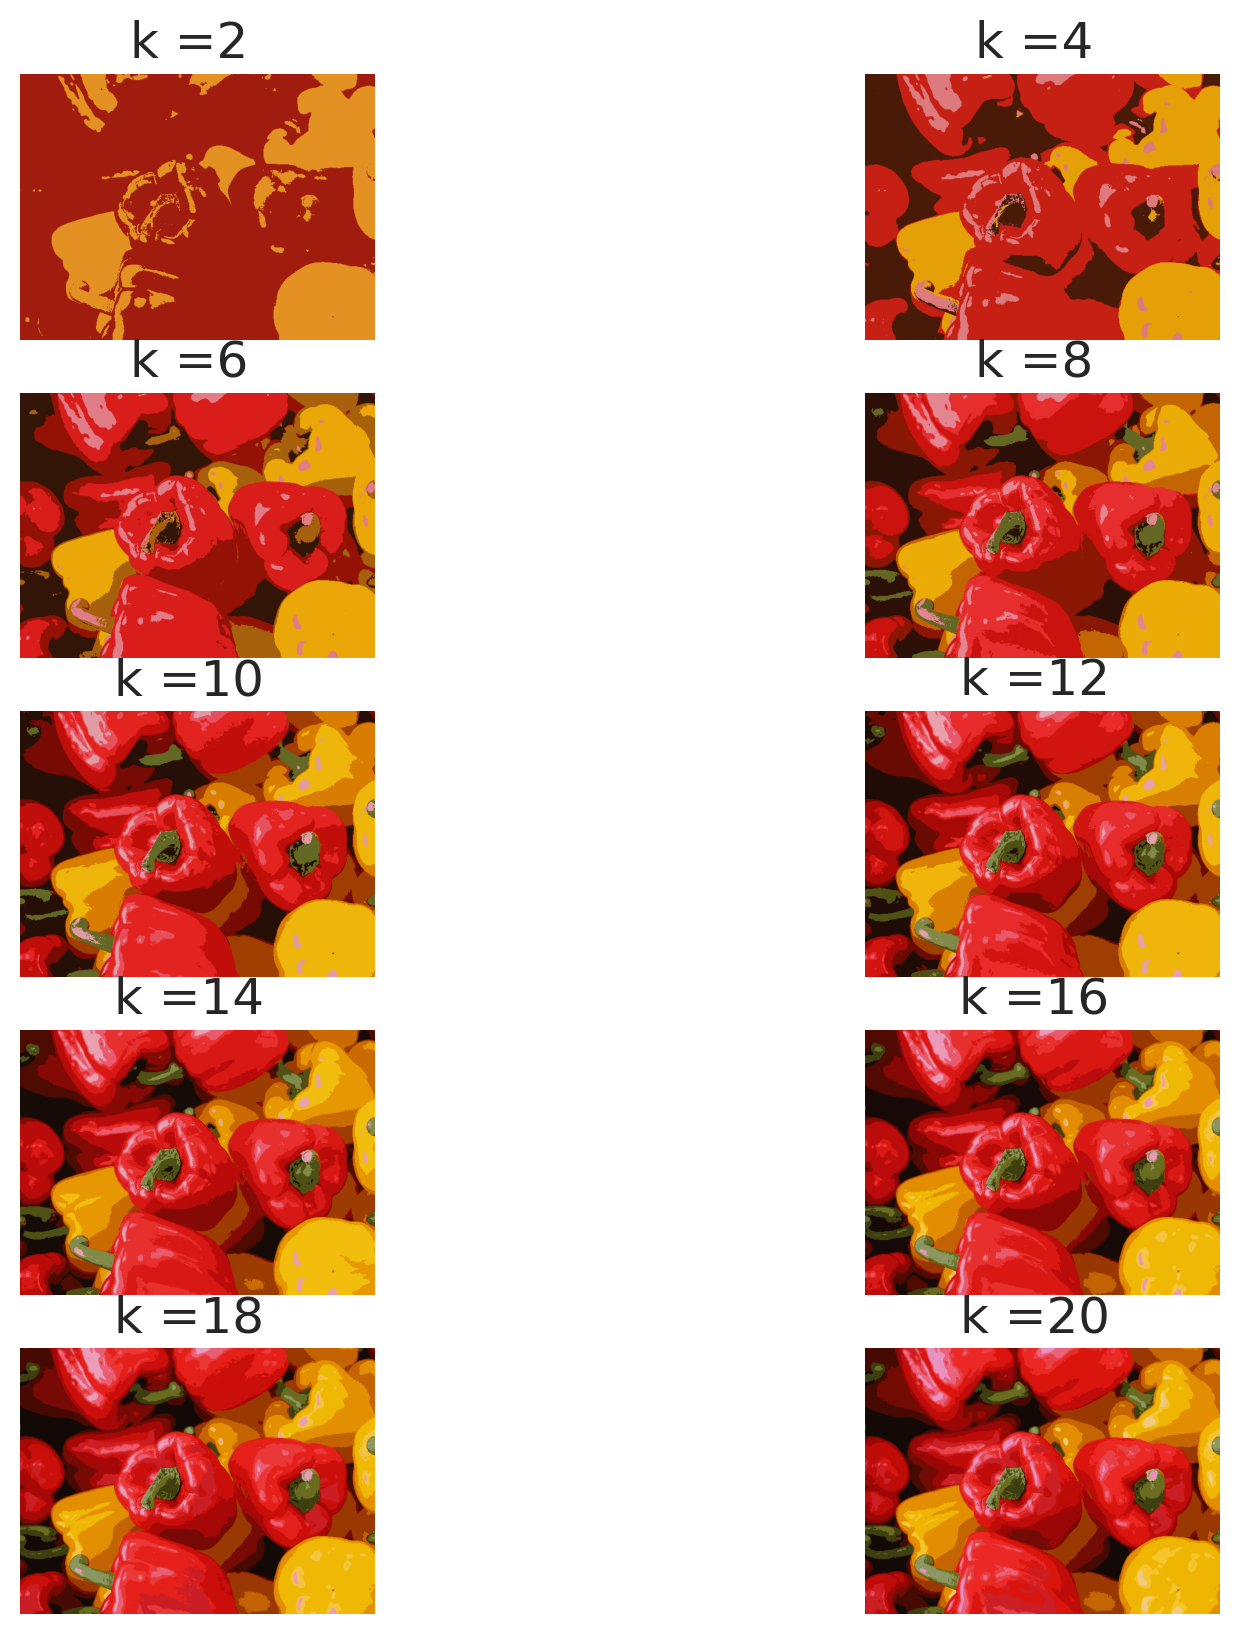

In [93]:
plt.figure(figsize=[10,10])
for i in range(len(k_list)):
  plt.subplot(5,2,i + 1)
  plt.imshow(img_list[i])
  plt.title(f'k ={k_list[i]} ')
  plt.axis('off')